# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

## Import Statements

In [143]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


## Notebook Presentation

In [144]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [145]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [146]:
for share in df_share_race_city.columns[2:]:
    df_share_race_city[share] = pd.to_numeric(df_share_race_city[share], errors='coerce')
df_share_race_city = df_share_race_city.fillna(0)

In [147]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29268 non-null  float64
 3   share_black            29268 non-null  float64
 4   share_native_american  29268 non-null  float64
 5   share_asian            29268 non-null  float64
 6   share_hispanic         29268 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [148]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_poverty = df_pct_poverty.fillna(0)
df_poverty = df_pct_poverty.drop('City', axis=1)
df_poverty = df_poverty.groupby('Geographic Area', as_index=False).agg({'poverty_rate':pd.Series.mean})

In [149]:
fig = px.bar(df_poverty, x="Geographic Area",  y='poverty_rate', title="Poverty Rate",color='poverty_rate', color_continuous_scale='Agsunset')
fig.update_layout(xaxis_title='US States',yaxis_title='Poverty Rate',coloraxis_showscale=False)
fig.update_xaxes(categoryorder='total descending')
fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [150]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
df_pct_completed_hs.fillna(df_pct_completed_hs['percent_completed_hs'].mean(), inplace=True)
df_hs = df_pct_completed_hs.drop('City', axis=1)
df_hs = df_hs.groupby('Geographic Area', as_index=False).agg({'percent_completed_hs':pd.Series.mean})

In [151]:
fig = px.bar(df_hs, x="Geographic Area",  y='percent_completed_hs', title="High School Graduation Rate", color='percent_completed_hs',
              color_continuous_scale='Agsunset')
fig.update_layout(xaxis_title='US States',yaxis_title='High School Percentage',coloraxis_showscale=False)
fig.update_xaxes(categoryorder='total descending')
fig.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [152]:
df_pov_hs = pd.merge(df_poverty, df_hs, on='Geographic Area')
df_pov_hs

,Geographic Area,poverty_rate,percent_completed_hs
0,AK,18.68,84.69
1,AL,20.61,80.31
2,AR,22.96,79.95
3,AZ,25.27,80.55
4,CA,16.89,82.01
5,CO,13.19,90.05
6,CT,9.14,91.59
7,DC,18.00,89.30
8,DE,12.56,88.52
9,FL,17.51,85.74


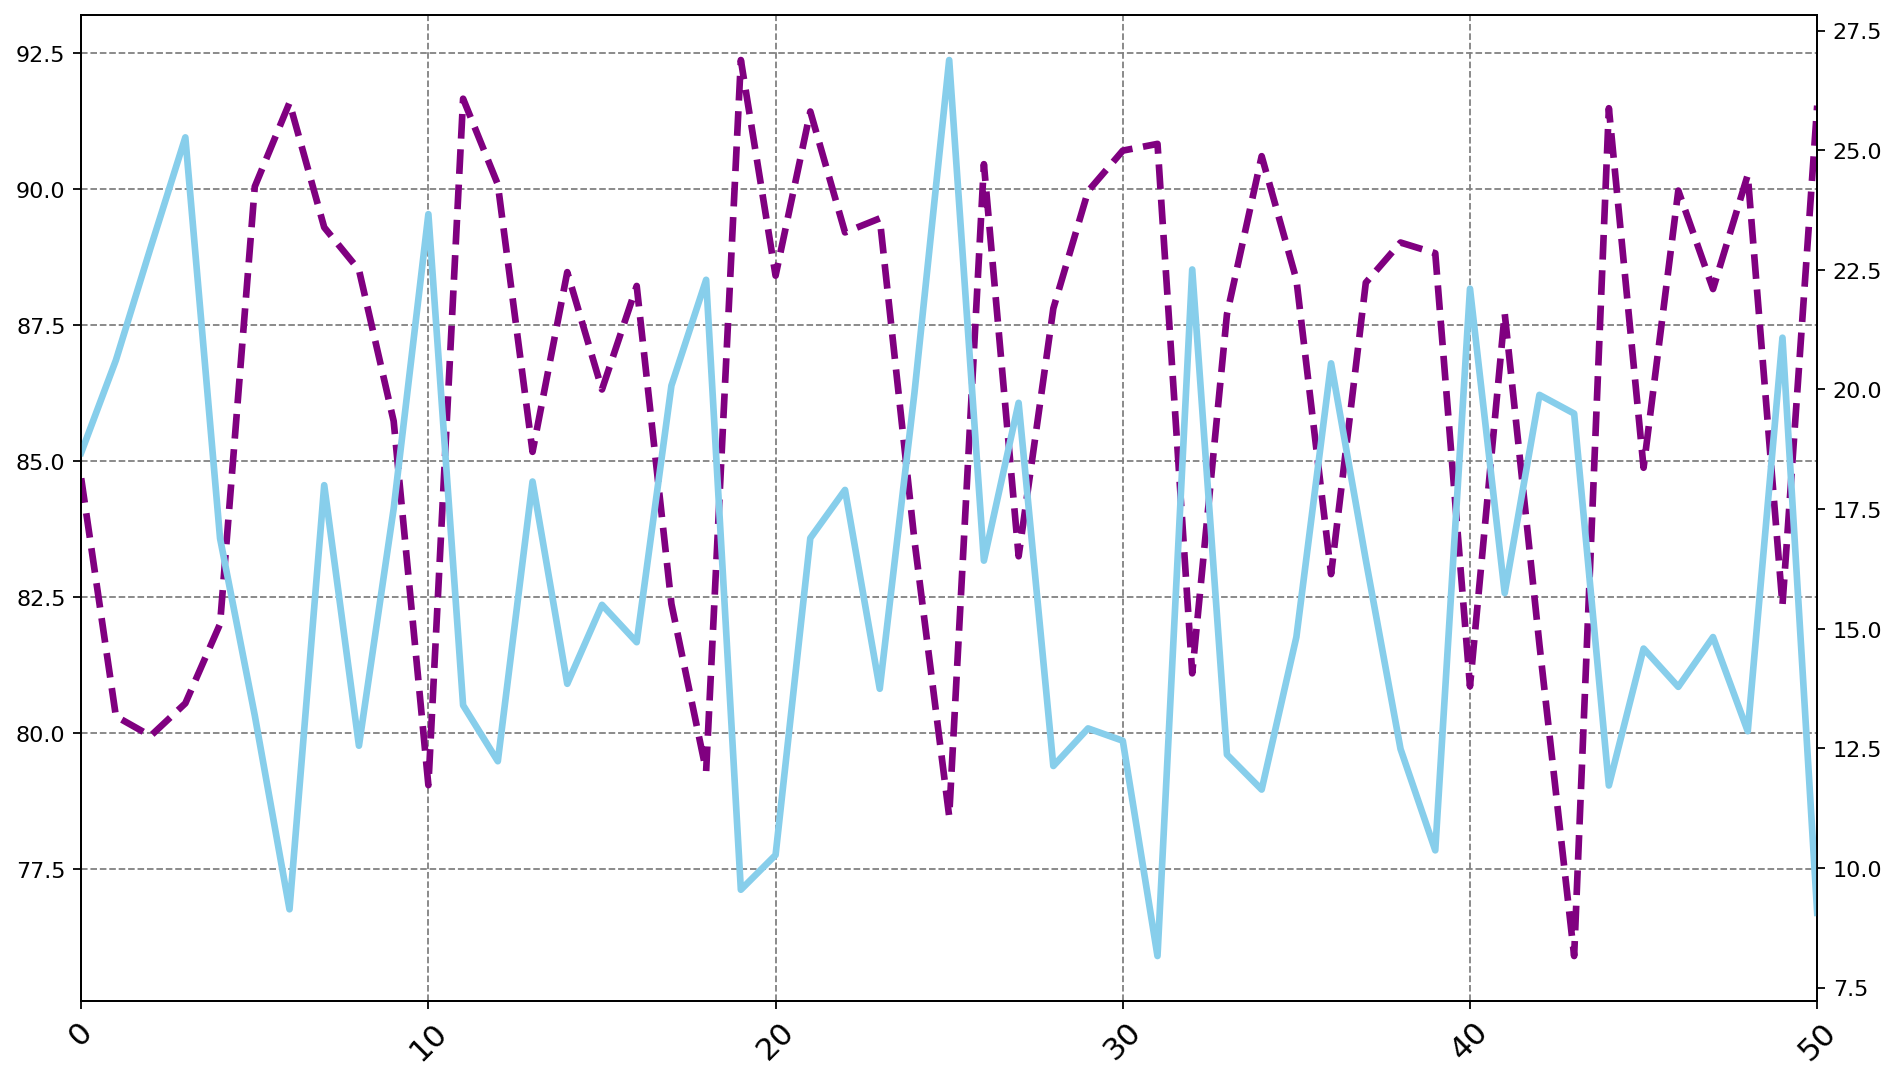

In [153]:
plt.figure(figsize=[14, 8], dpi=160)
plt.xticks(rotation=45, fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')
# ax1.set_ylim([0])
ax1.set_xlim([0, 50])



ax1.plot(df_pov_hs['percent_completed_hs'], color='purple', linewidth=3, linestyle='dashed')
ax2.plot(df_pov_hs['poverty_rate'],  color='skyblue', linewidth=3)

plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

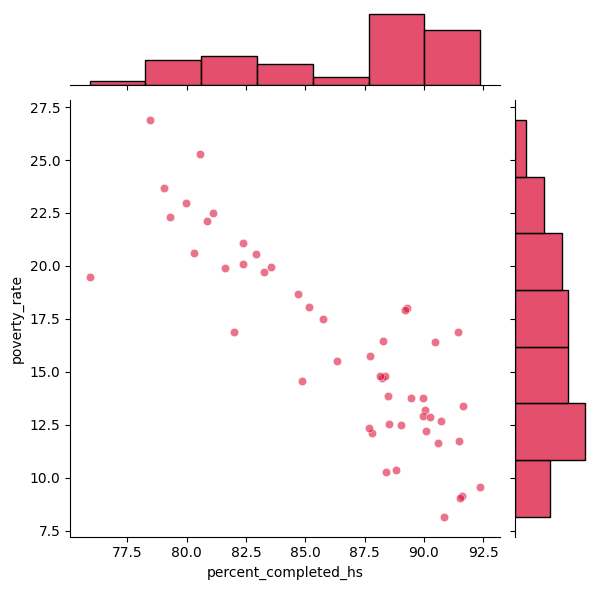

In [154]:
sns.jointplot(df_pov_hs, x='percent_completed_hs', y='poverty_rate', kind='scatter', joint_kws={'alpha':0.6}, color='crimson')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

<Axes: xlabel='percent_completed_hs', ylabel='poverty_rate'>

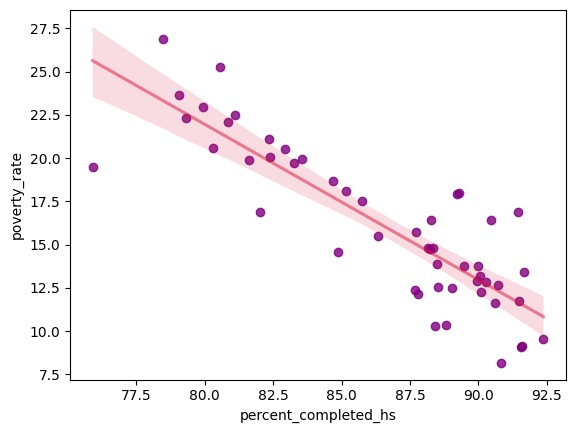

In [155]:

sns.regplot(df_pov_hs, x='percent_completed_hs', y='poverty_rate', scatter_kws={'alpha':0.8, 'color':'purple'}, line_kws={'color':'crimson', 'alpha':0.5})

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [156]:
states = df_share_race_city.groupby('Geographic area').sum()
states = states.drop(['City'], axis=1)
states = states.div(states.sum(axis=1), axis=0).mul(100)
states.reset_index(inplace=True)

df = states.melt(id_vars=('Geographic area'), var_name='Share')

In [157]:

fig = px.bar(df, x="Geographic area", color='Share', y='value', title="Racial Percentage", barmode='group', width=1300)
fig.show()

In [158]:
fig = px.bar(df, x="Geographic area", color='Share', y='value', title="Racial Percentage", width=1300, height=750)
fig.show()

# Create Donut Chart by of People Killed by Race


In [159]:
df_fatalities.race.fillna('None', inplace=True)
race = df_fatalities.groupby('race', as_index=False).agg('size')
race

,race,size
0,A,39
1,B,618
2,H,423
3,N,31
4,None,195
5,O,28
6,W,1201


In [160]:
fig = px.pie(race, values='size', names='race', hole=0.6)
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women


In [161]:
gender = df_fatalities.groupby('gender', as_index=False).size()
gender

,gender,size
0,F,107
1,M,2428


In [162]:
fig = px.pie(gender, values='size', names=['Female', 'Male'])
fig.show()

# Create a Box Plot Showing the Age and Manner of Death


In [163]:
df_fatalities.age = pd.to_numeric(df_fatalities.age)
df_fatalities.age.fillna(df_fatalities.age.mean(), inplace=True)

In [164]:
fig = px.box(df_fatalities, x="gender", y="age", points="all", color='manner_of_death', notched=True,)
fig.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [165]:
df_fatalities.armed.fillna('undetermined', inplace=True)
people_armed = df_fatalities.groupby('armed', as_index=False).size()
unarmed = people_armed.loc[(people_armed['armed'] == 'undetermined') | (people_armed['armed'] == 'unarmed')]['size'].sum()
armed = people_armed.loc[(people_armed['armed'] != 'undetermined') & (people_armed['armed'] != 'unarmed')]['size'].sum()

total_people = armed + unarmed
arm_pct = armed / total_people * 100


In [166]:
fig = px.bar(people_armed, y="armed", x='size', title="Armed People", width=1300, orientation='h', height=1500, 
             color_continuous_scale='Agsunset', color='size')
fig.update_layout(xaxis_title='Count',yaxis_title='Weapon',coloraxis_showscale=False)
fig.update_yaxes(categoryorder='total ascending')
fig.show()

In [167]:
armed_vs_unarmed = people_armed.loc[(people_armed['armed'] == 'gun') | (people_armed['armed'] == 'unarmed')]
fig = px.pie(armed_vs_unarmed, values='size', names='armed', hole=0.6)
fig.show()


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [168]:
under_25 = df_fatalities.loc[df_fatalities['age'] <= 25].shape[0]
print(f'Percentage of people killed under 25 years were {round(under_25 / total_people * 100, 2)}%')


Percentage of people killed under 25 years were 21.81%


In [169]:
by_age = df_fatalities.groupby('age').size()

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

In [170]:
fig = px.histogram(by_age, x=by_age.values, y=by_age.index ,nbins=20, opacity=0.6,barmode='overlay',marginal='box')
fig.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [171]:
by_race = df_fatalities.groupby(['race', 'age'], as_index=False).size()
by_race

,race,age,size
0,A,15.00,1
1,A,18.00,2
2,A,20.00,1
3,A,25.00,1
4,A,26.00,1
...,...,...,...
295,W,76.00,4
296,W,79.00,1
297,W,82.00,2
298,W,83.00,2


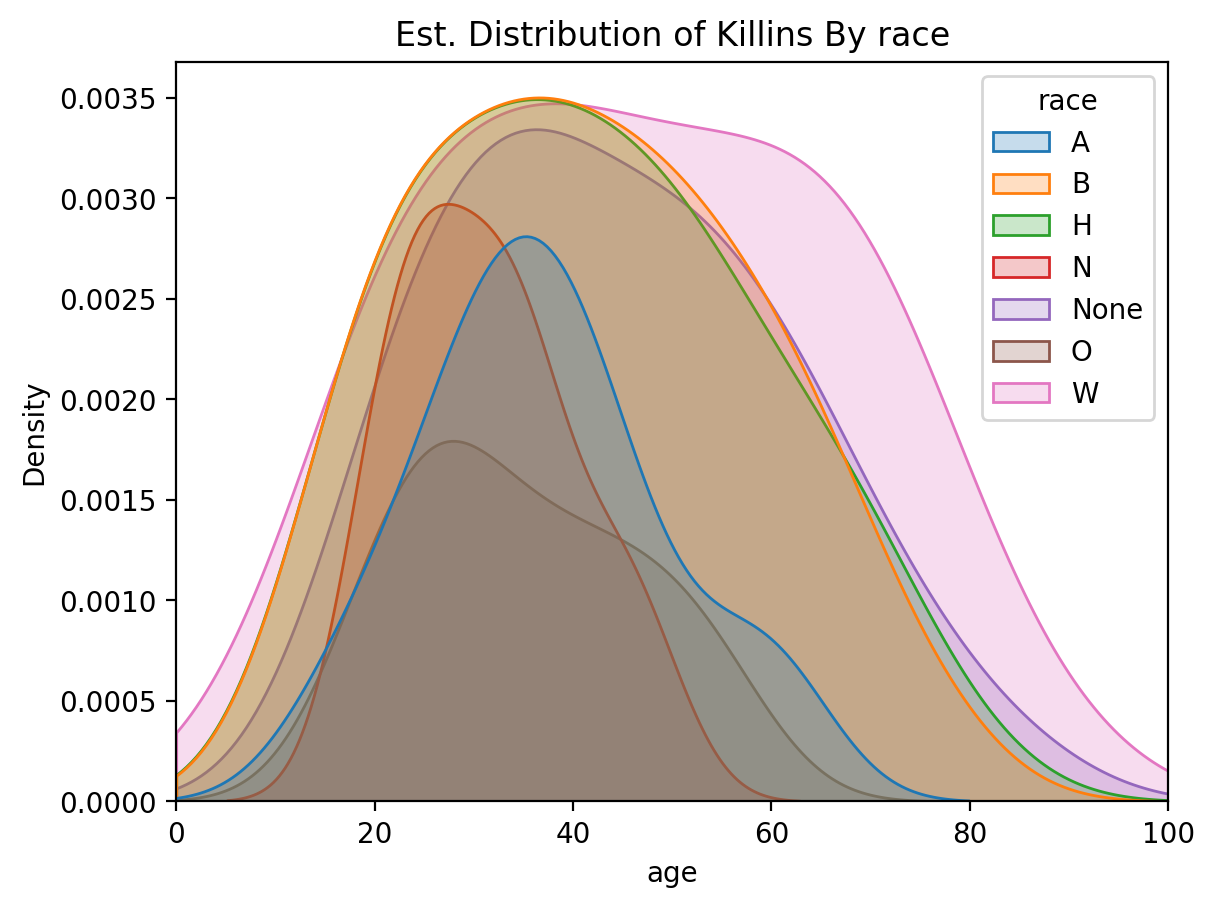

In [172]:
plt.figure(dpi=200)
sns.kdeplot(data=by_race, x="age", hue="race", fill=True, clip=(0, 100))
plt.title('Est. Distribution of Killins By race')
plt.xlim(0, 100)
plt.show()

<Axes: xlabel='age', ylabel='Density'>

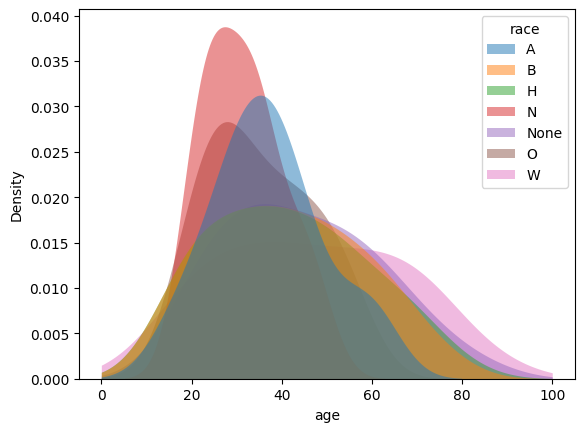

In [173]:
sns.kdeplot(data=by_race, x="age", hue="race", clip=(0, 100), alpha=.5, linewidth=0,common_norm=False, fill=True)

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [174]:
fig = px.bar(race, y="race", x='size', title="Race of People", width=1300, orientation='h', 
             color_continuous_scale='Agsunset', color='size')
fig.update_layout(xaxis_title='Deaths',yaxis_title='Race',coloraxis_showscale=False)
fig.update_yaxes(categoryorder='total ascending')
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [175]:
mental_illness = df_fatalities.groupby(df_fatalities['signs_of_mental_illness'], as_index=False).size()
mental_illness

,signs_of_mental_illness,size
0,False,1902
1,True,633


In [176]:
fig = px.pie(mental_illness, values='size', names=['Not Mentally ill', 'Mentally ill'], hole=0.6)
fig.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [177]:
cities = df_fatalities.groupby('city', as_index=False).size()
cities.sort_values('size', ascending=False, inplace=True)

In [178]:
fig = px.bar(cities[:10], y="city", x='size', title="Cities with most Kills", width=1300, orientation='h', 
             color_continuous_scale='Agsunset', color='size')
fig.update_layout(xaxis_title='Deaths',yaxis_title='Race',coloraxis_showscale=False)
fig.update_yaxes(categoryorder='total ascending')
fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [179]:
cities_by_race = df_fatalities.loc[df_fatalities['city'].isin(cities[:10].city)]
cities_by_race =  cities_by_race.groupby(['city', 'race'], as_index=False).size()


In [180]:
fig = px.bar(cities_by_race, y="city", color='race', x='size', title="Racial Percentage", width=1200, orientation='h', height=400)
fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(xaxis_title='Deaths by Race',yaxis_title='Cities',coloraxis_showscale=False)
fig.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [181]:
states = df_fatalities.groupby(df_fatalities['state'], as_index=False).size()
states

,state,size
0,AK,15
1,AL,50
2,AR,26
3,AZ,118
4,CA,424
5,CO,74
6,CT,9
7,DC,11
8,DE,8
9,FL,154


In [182]:
fig = px.choropleth(df_poverty, locations='Geographic Area', locationmode = 'USA-states', color='poverty_rate', scope="usa",  color_continuous_scale=px.colors.sequential.matter)
fig.show()

In [183]:
fig = px.choropleth(states, locations='state', locationmode = 'USA-states', color='size', scope="usa",  color_continuous_scale=px.colors.sequential.matter)
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [184]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2535 non-null   int64         
 1   name                     2535 non-null   object        
 2   date                     2535 non-null   datetime64[ns]
 3   manner_of_death          2535 non-null   object        
 4   armed                    2535 non-null   object        
 5   age                      2535 non-null   float64       
 6   gender                   2535 non-null   object        
 7   race                     2535 non-null   object        
 8   city                     2535 non-null   object        
 9   state                    2535 non-null   object        
 10  signs_of_mental_illness  2535 non-null   bool          
 11  threat_level             2535 non-null   object        
 12  flee                     2470 non-

C:\Users\Aneeq\AppData\Local\Temp\ipykernel_12852\12652780.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [185]:
by_date = df_fatalities.groupby(pd.Grouper(key='date',freq='M')).size()
by_date

date
2015-01-31    70
2015-02-28    78
2015-03-31    87
2015-04-30    88
2015-05-31    85
2015-06-30    68
2015-07-31    85
2015-08-31    86
2015-09-30    90
2015-10-31    89
2015-11-30    80
2015-12-31    85
2016-01-31    85
2016-02-29    79
2016-03-31    89
2016-04-30    75
2016-05-31    82
2016-06-30    90
2016-07-31    78
2016-08-31    79
2016-09-30    71
2016-10-31    77
2016-11-30    84
2016-12-31    74
2017-01-31    75
2017-02-28    69
2017-03-31    74
2017-04-30    70
2017-05-31    61
2017-06-30    63
2017-07-31    71
2017-08-31    18
2017-09-30    23
2017-10-31    21
2017-11-30    16
2017-12-31    20
Freq: M, dtype: int64

In [186]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

years = mdates.YearLocator()
months = mdates.MonthLocator()
year_fmt = mdates.DateFormatter("%Y")

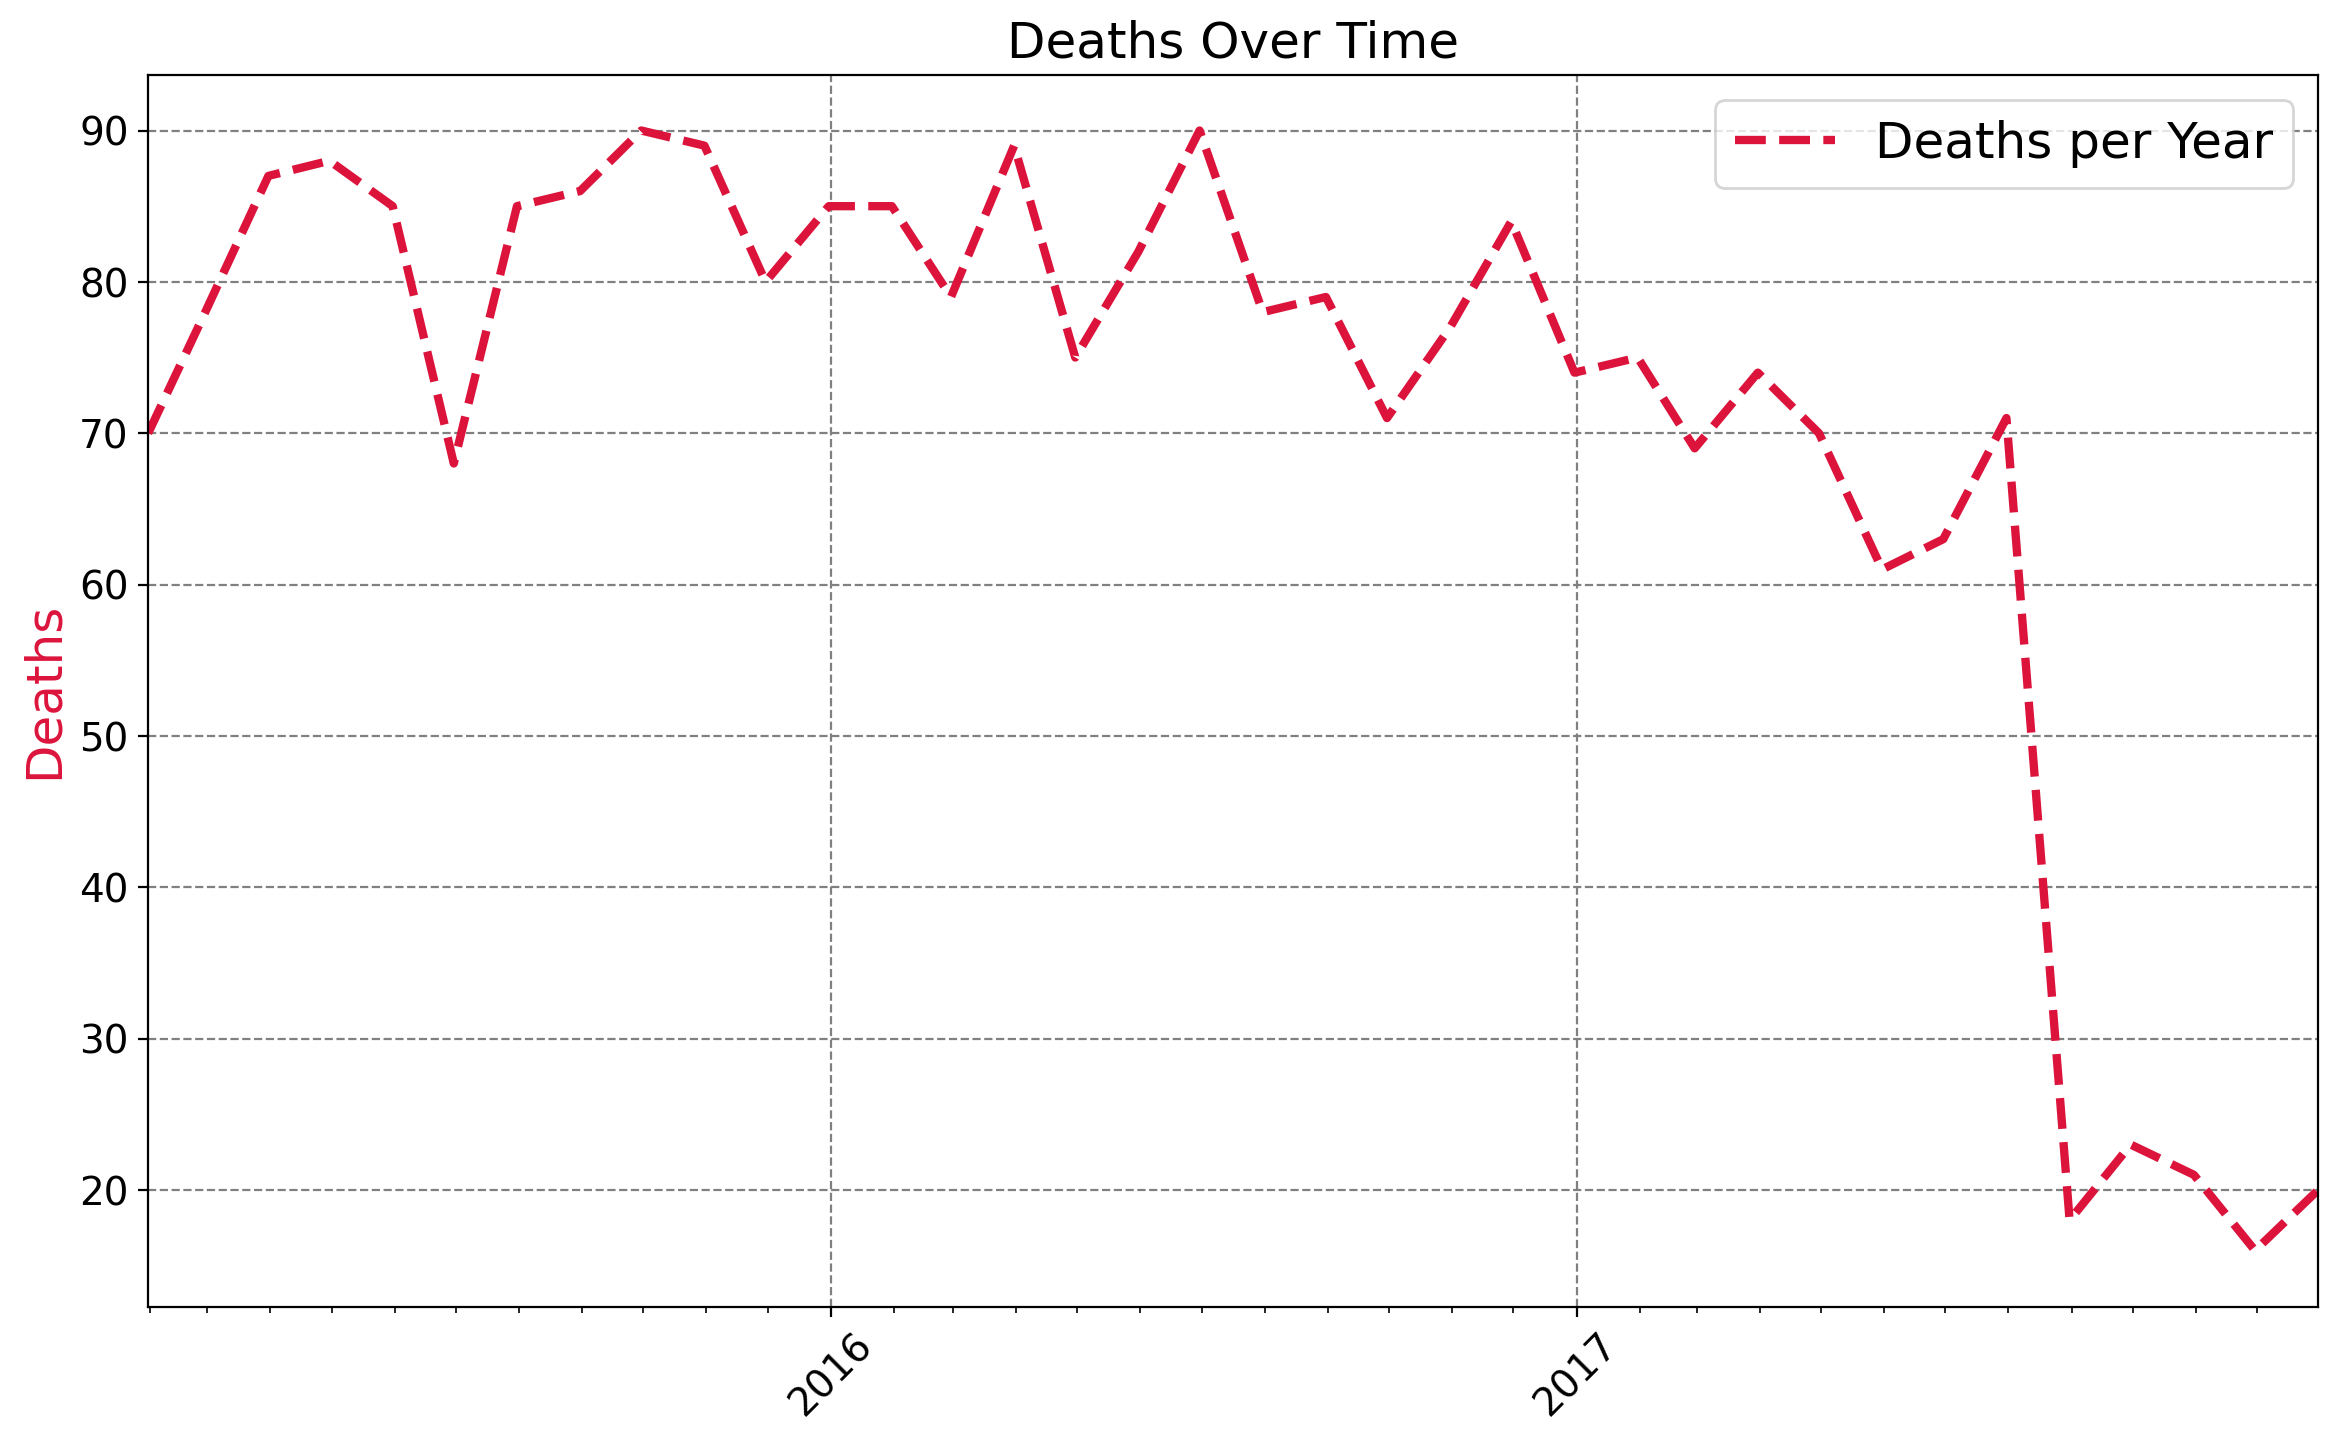

In [187]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Deaths Over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.ylabel('Deaths', color='crimson', fontsize=18)
 
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(year_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([by_date.index.min(), by_date.index.max()])
 
plt.grid(color='grey', linestyle='--')
 
line, = plt.plot(by_date.index, 
                    by_date.values, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='Deaths per Year')
 
plt.legend(handles=[line],
           fontsize=18)

plt.show()


# Epilogue

Now that we have analysed the data ourself, you can also read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).